In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
from shutil import copyfile

# Functions

## Split data

In [2]:
def create_train_valid_test_dirs(root_path, subdir_names, train_valid_test_names=['train', 'valid', 'test']):
    """ Function for creating separate folders that contain data for training, validation and testing of the model
    Args:
        1) root_path - the path to the parent folder in which you want to create subfolders
        2) subdir_names - a list of label class names (subfolders with the specified names will be created in each of the train, valid, and test folders)
        3) train_valid_test_names - a list of names of training, validation and test samples
    Returns:
        None; but creates folders
    """
    parent_directories = []
    for dir_name in train_valid_test_names:
        parent_directories.append(os.path.join(root_path, dir_name))

    for directory in parent_directories:
        if not os.path.exists(directory):
            os.makedirs(directory)
        for subdirectory in subdir_names:
            subdir_name = os.path.join(directory + '/', subdirectory)
            if not os.path.exists(subdir_name):
                os.makedirs(subdir_name)

In [29]:
def split_data(source_dir_path, train_dir_path, valid_dir_path, test_dir_path, train_test_split=0.8, train_valid_split=0.85, random_sample=True):
    """ Function to split the files of the specified folder into training, validation and test samples by copying 
    the files from source_dir_path to the corresponding folders
    Args:
        1) source_dir_path - the path to the folder containing the original data to be split into train/valid/test
        2) train_dir_path - the path to the folder that will contain the training data
        3) valid_dir_path - the path to the folder that will contain the validation data
        4) test_dir_path - the path to the folder that will contain the test data
        5) train_test_split - the ratio between training and test samples ([0; 1])
        6) train_valid_split - the ratio between training and validation samples ([0; 1])
        7) random_sample - whether files need to be shuffled randomly before splitting into training, validation, and test samples
    Returns:
        None, but split the files into training, validation and test samples
    """
    fnames = os.listdir(source_dir_path)

    processed_fnames = []
    for file_name in fnames:
        if os.path.getsize(os.path.join(source_dir_path, file_name)) > 0:
            processed_fnames.append(file_name)
        else:
            print(f'{file_name} is zero length, so ignoring.')
    
    if random_sample:
        processed_fnames = random.sample(processed_fnames, len(processed_fnames))
        
    split_index = int(train_test_split * len(processed_fnames))
    train_valid_files = processed_fnames[:split_index]
    test_files = processed_fnames[split_index:]
    
    split_index = int(train_valid_split * len(train_valid_files))
    train_files = train_valid_files[:split_index]
    valid_files = train_valid_files[split_index:]
    
    # Copy training files
    for file in train_files:
        source = os.path.join(source_dir_path, file)
        destination = os.path.join(train_dir_path, file)
        copyfile(source, destination)
    
    # Copy validation files
    for file in valid_files:
        source = os.path.join(source_dir_path, file)
        destination = os.path.join(valid_dir_path, file)
        copyfile(source, destination)
    
    # Copy test files
    for file in test_files:
        source = os.path.join(source_dir_path, file)
        destination = os.path.join(test_dir_path, file)
        copyfile(source, destination)
        

In [4]:
def split_class_data(source_dir_path, train_valid_test_paths, class_dir_name, train_test_split=0.8, train_valid_split=0.85, random_sample=True):
    """ Function for dividing the data of one label class into train/valid/test
    Args:
        1) source_dir_path - the path to the folder containing the original data of all label classes which needs to be splitted into train/valid/test;
        2) train_valid_test_paths - the list of paths to the folders of training, validation and test samples 
        (the paths are specified in this order: train, valid, test)
        3) class_dir_name - the name of the folder that contains the label class data
        4) train_test_split - the ratio between training and test samples ([0; 1])
        5) train_valid_split - the ratio between training and validation samples ([0; 1])
        6) random_sample - whether files need to be shuffled randomly before splitting into training, validation, and test samples
    Returns:
        None, but split the files of label class into training, validation and test samples
    """
    train_dir_path_class = os.path.join(train_valid_test_paths[0], class_dir_name)
    valid_dir_path_class = os.path.join(train_valid_test_paths[1], class_dir_name)
    test_dir_path_class = os.path.join(train_valid_test_paths[2], class_dir_name)
    source_dir_path_class = os.path.join(source_dir_path, class_dir_name)
    split_data(source_dir_path=source_dir_path_class, train_dir_path=train_dir_path_class, valid_dir_path=valid_dir_path_class, 
               test_dir_path=test_dir_path_class, 
               train_test_split=train_test_split, train_valid_split=train_valid_split, random_sample=random_sample)

## Display data

In [55]:
def display_image(root_path, image_name, title=None):
    """ Function to display an image
    Args:
        1) root_path - the path to the folder that contains the image
        2) image_name - the name of the image
        3) title - the title that will be displayed above the image
    Returns:
        None; but displays an image
    """
    img = mpimg.imread(os.path.join(root_path, image_name))
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [28]:
def display_pie_chart(df, column_name, title=None, column_contains_count=False, filename=None):
    """ Function to display the percentage ratio of column (with the name column_name) content 
    Args:
        1) df - the original dataframe that contains the required information
        2) column_name - the name of the df dataframe column whose percentage values are to be found
        3) title - the title of the graph
        4) column_contains_count - the dataframe column already contains the number of repetitions of the target values (target value count)
        5) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        None, but plots graph
    """
    # Calculate the percentage of each activity in original_df
    if column_contains_count:
        activity_percentages_df = df[column_name] / sum(df[column_name])
    else:
        activity_percentages_df = df[column_name].value_counts(normalize=True) * 100
        
    plt.figure(figsize=(12, 6))

    # Plot pie chart for df
    sns.set_palette("Set3")
    plt.pie(activity_percentages_df, labels=activity_percentages_df.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)

    # Adjust layout
    plt.tight_layout()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()
    
    
def display_pie_charts(first_df, second_df, column, column_contains_count=False, first_chart_title='First DataFrame', second_chart_title='Second DataFrame', filename=None):
    """Function for displaying the ratio of column content between two dataframes in the form of pie charts
    Args:
        1) first_df - the original dataframe that contains the required information
        2) second_df - a dataframe that contains the results of windowing 
        3) column - the name of the dataframe column whose percentage values are to be found
        4) column_contains_count - the dataframe column already contains the number of repetitions of the target values (target value count)
        5) first_chart_title - the title for the first pie chart
        6) second_chart_title - the title for the second pie chart
        7) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        None; just builds a pie chart to display the ratio of column contents between two dataframes
    """
    # Calculate the percentage of each activity in first_df
    if column_contains_count:
        activity_percentages_first_df = first_df[column] / sum(first_df[column]) * 100
    else:
        activity_percentages_first_df = first_df[column].value_counts(normalize=True) * 100

    # Calculate the percentage of each activity in second_df
    if column_contains_count:
        activity_percentages_second_df = second_df[column] / sum(second_df[column]) * 100
    else:
        activity_percentages_second_df = second_df[column].value_counts(normalize=True) * 100

    # Create subplots for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot pie chart for df
    sns.set_palette("Set3")
    axes[0].pie(activity_percentages_first_df, labels=activity_percentages_first_df.index, autopct='%1.1f%%', startangle=140)
    axes[0].set_title(first_chart_title)

    # Plot pie chart for windowed_df
    sns.set_palette("Set3")
    axes[1].pie(activity_percentages_second_df, labels=activity_percentages_first_df.index, autopct='%1.1f%%', startangle=140)
    axes[1].set_title(second_chart_title)

    # Adjust layout
    plt.tight_layout()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

# Load data

In [5]:
source_path = 'data/garbage_classification_6_classes/garbage_classification/'

source_path_cardboard = os.path.join(source_path, 'cardboard')
source_path_glass = os.path.join(source_path, 'glass')
source_path_metal = os.path.join(source_path, 'metal')
source_path_paper = os.path.join(source_path, 'paper')
source_path_plastic = os.path.join(source_path, 'plastic')
source_path_trash = os.path.join(source_path, 'trash')

In [6]:
cardboard_image_names = os.listdir(source_path_cardboard)
glass_image_names = os.listdir(source_path_glass)
metal_image_names = os.listdir(source_path_metal)
paper_image_names = os.listdir(source_path_paper)
plastic_image_names = os.listdir(source_path_plastic)
trash_image_names = os.listdir(source_path_trash)

In [7]:
print(f"There are {len(cardboard_image_names)} images of cardboard.") # 403
print(f"There are {len(glass_image_names)} images of glass.") # 501
print(f"There are {len(metal_image_names)} images of metal.") # 410
print(f"There are {len(paper_image_names)} images of paper.") # 594
print(f"There are {len(plastic_image_names)} images of plastic.") # 482
print(f"There are {len(trash_image_names)} images of trash.") # 137

There are 403 images of cardboard.
There are 501 images of glass.
There are 410 images of metal.
There are 594 images of paper.
There are 482 images of plastic.
There are 137 images of trash.


## Display classes distribution

In [11]:
classes_representatives = {'cardboard': len(cardboard_image_names), 
                           'glass': len(glass_image_names),
                           'metal': len(metal_image_names), 
                           'paper': len(paper_image_names),
                           'plastic': len(plastic_image_names), 
                           'trash': len(trash_image_names)
                          }
for label_class in classes_representatives.keys():
    print(f"There are {classes_representatives[label_class]} images of {label_class}.")

There are 403 images of cardboard.
There are 501 images of glass.
There are 410 images of metal.
There are 594 images of paper.
There are 482 images of plastic.
There are 137 images of trash.


In [15]:
classes_df = pd.DataFrame(list(classes_representatives.items()), columns=['class', 'count'])
classes_df

,class,count
0,cardboard,403
1,glass,501
2,metal,410
3,paper,594
4,plastic,482
5,trash,137


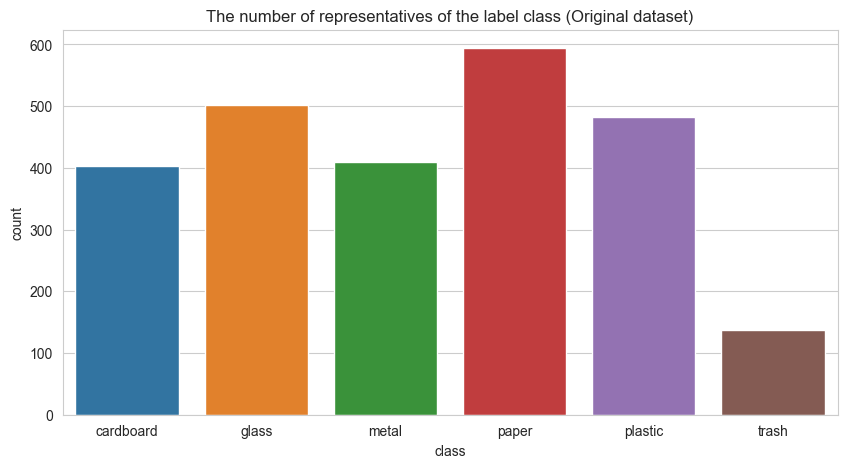

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.barplot(data=classes_df, x='class', y='count')
plt.title('The number of representatives of the label class (Original dataset)')
plt.savefig('graphs/original_barplot.png')
plt.show()

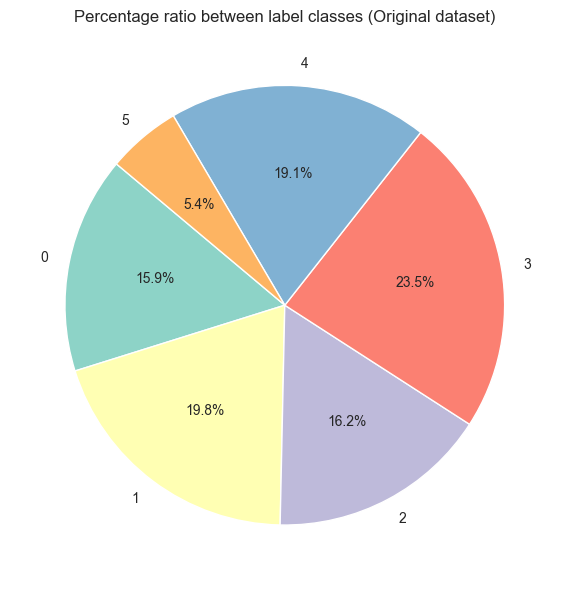

In [43]:
display_pie_chart(df=classes_df, column_name='count', title='Percentage ratio between label classes (Original dataset)',
                  column_contains_count=True, filename='graphs/original_piechart')

## Display representatives of each class

### Cardboard

In [ ]:
for cardboard_image_name in cardboard_image_names[:5]:
    display_image(root_path=source_path_cardboard, image_name=cardboard_image_name, title=cardboard_image_name)

### Glass

In [ ]:
for glass_image_name in glass_image_names[:5]:
    display_image(root_path=source_path_glass, image_name=glass_image_name, title=glass_image_name)

### Metal

In [ ]:
for metal_image_name in metal_image_names[:5]:
    display_image(root_path=source_path_metal, image_name=metal_image_name, title=metal_image_name)

### Paper

In [ ]:
for paper_image_name in paper_image_names[:5]:
    display_image(root_path=source_path_paper, image_name=paper_image_name, title=paper_image_name)

### Plastic

In [ ]:
for plastic_image_name in plastic_image_names[:5]:
    display_image(root_path=source_path_plastic, image_name=plastic_image_name, title=plastic_image_name)

### Trash

In [ ]:
for trash_image_name in trash_image_names[:5]:
    display_image(root_path=source_path_trash, image_name=trash_image_name, title=trash_image_name)

# Split data into train, validation and test

## Create folders for train/valid/test data

In [8]:
destination_path = 'data/garbage_classification_6_classes/garbage_classification_TrainValidTest/'

garbage_class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
create_train_valid_test_dirs(root_path=destination_path, subdir_names=garbage_class_names)

## Split the data and save it in the appropriate folders

### Split classes data

In [12]:
train_dir_path = 'data/garbage_classification_6_classes/garbage_classification_TrainValidTest/train/'
valid_dir_path = 'data/garbage_classification_6_classes/garbage_classification_TrainValidTest/valid/'
test_dir_path = 'data/garbage_classification_6_classes/garbage_classification_TrainValidTest/test/'
train_valid_test_paths = [train_dir_path, valid_dir_path, test_dir_path]

for class_name in garbage_class_names:
    split_class_data(source_dir_path=source_path, train_valid_test_paths=train_valid_test_paths, 
                 class_dir_name=class_name, train_test_split=0.9, train_valid_split=0.85, random_sample=False)
    
    class_train_images = os.listdir(os.path.join(train_dir_path, class_name))
    class_valid_images = os.listdir(os.path.join(valid_dir_path, class_name))
    class_test_images = os.listdir(os.path.join(test_dir_path, class_name))

    print(f"{class_name}: train = {len(class_train_images)}") 
    print(f"{class_name}: valid = {len(class_valid_images)}") 
    print(f"{class_name}: test = {len(class_test_images)}") 
    print("")

train_test_split_index = 362
train_valid_split_index = 307
cardboard: train = 307
cardboard: valid = 55
cardboard: test = 41

train_test_split_index = 450
train_valid_split_index = 382
glass: train = 382
glass: valid = 68
glass: test = 51

train_test_split_index = 369
train_valid_split_index = 313
metal: train = 313
metal: valid = 56
metal: test = 41

train_test_split_index = 534
train_valid_split_index = 453
paper: train = 453
paper: valid = 81
paper: test = 60

train_test_split_index = 433
train_valid_split_index = 368
plastic: train = 368
plastic: valid = 65
plastic: test = 49

train_test_split_index = 123
train_valid_split_index = 104
trash: train = 104
trash: valid = 19
trash: test = 14



#### Check classes distribution after spliting

In [38]:
garbage_class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
classes_train_dict = {}
classes_valid_dict = {}
classes_test_dict = {}
for class_name in garbage_class_names:
    classes_train_dict[class_name] = 0
    classes_valid_dict[class_name] = 0
    classes_test_dict[class_name] = 0

In [39]:
train_dir_path = 'data/garbage_classification_6_classes/garbage_classification_TrainValidTest/train/'
valid_dir_path = 'data/garbage_classification_6_classes/garbage_classification_TrainValidTest/valid/'
test_dir_path = 'data/garbage_classification_6_classes/garbage_classification_TrainValidTest/test/'
train_valid_test_paths = [train_dir_path, valid_dir_path, test_dir_path]

for class_name in garbage_class_names:
    class_train_images = os.listdir(os.path.join(train_dir_path, class_name))
    class_valid_images = os.listdir(os.path.join(valid_dir_path, class_name))
    class_test_images = os.listdir(os.path.join(test_dir_path, class_name))

    classes_train_dict[class_name] = len(class_train_images)
    classes_valid_dict[class_name] = len(class_valid_images)
    classes_test_dict[class_name] = len(class_test_images)

print(f"classes_train_dict = {classes_train_dict}")
print(f"classes_valid_dict = {classes_valid_dict}")
print(f"classes_test_dict = {classes_test_dict}")

classes_train_dict = {'cardboard': 307, 'glass': 382, 'metal': 313, 'paper': 453, 'plastic': 368, 'trash': 104}
classes_valid_dict = {'cardboard': 55, 'glass': 68, 'metal': 56, 'paper': 81, 'plastic': 65, 'trash': 19}
classes_test_dict = {'cardboard': 41, 'glass': 51, 'metal': 41, 'paper': 60, 'plastic': 49, 'trash': 14}


In [44]:
train_classes_df = pd.DataFrame(list(classes_train_dict.items()), columns=['class', 'count'])
valid_classes_df = pd.DataFrame(list(classes_valid_dict.items()), columns=['class', 'count'])
test_classes_df = pd.DataFrame(list(classes_test_dict.items()), columns=['class', 'count'])

train_classes_df

,class,count
0,cardboard,307
1,glass,382
2,metal,313
3,paper,453
4,plastic,368
5,trash,104


##### Train data

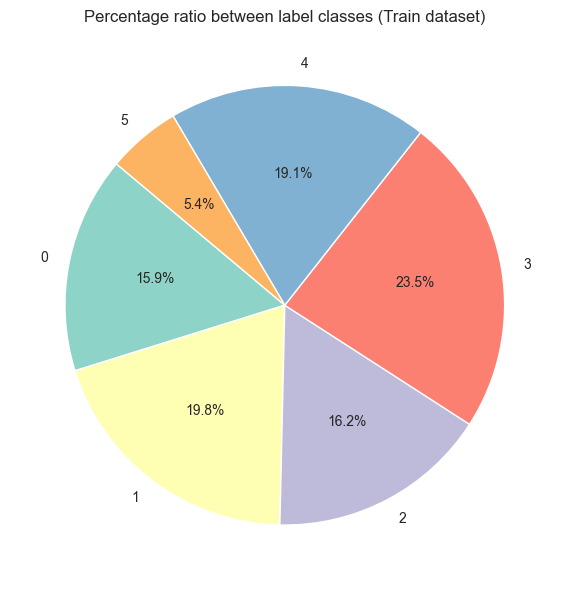

In [48]:
display_pie_chart(df=train_classes_df, column_name='count', title='Percentage ratio between label classes (Train dataset)',
                  column_contains_count=True, filename='graphs/train_piechart')

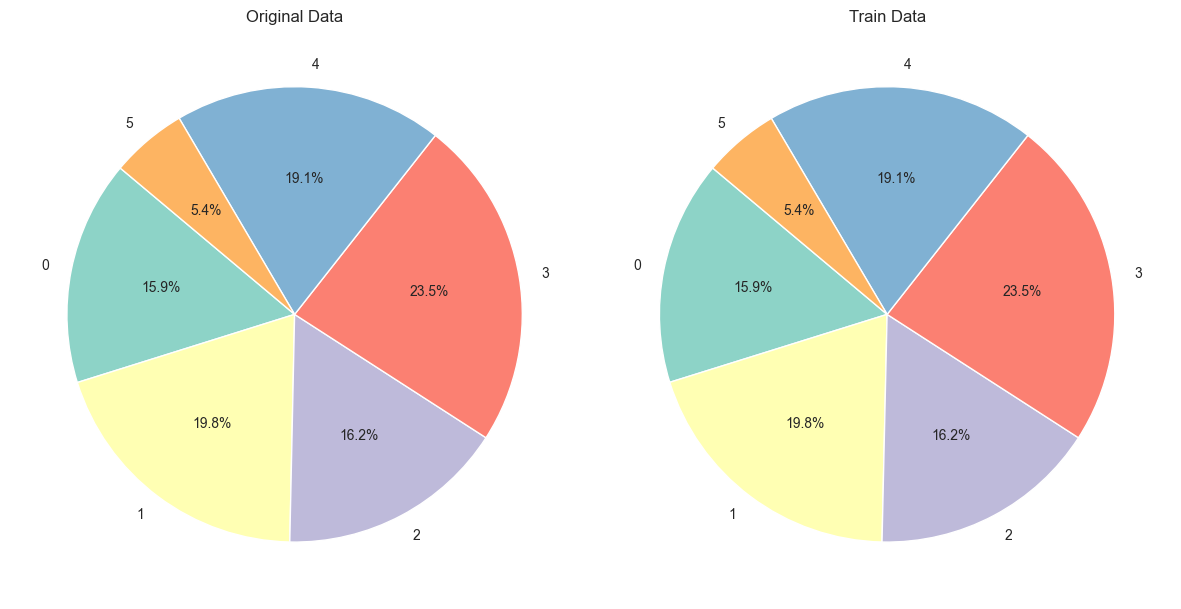

In [45]:
display_pie_charts(first_df=classes_df, second_df=train_classes_df, column='count',
                   column_contains_count=True, 
                   first_chart_title='Original Data', second_chart_title='Train Data', 
                   filename='graphs/original_vs_train_piecharts')

##### Valid data

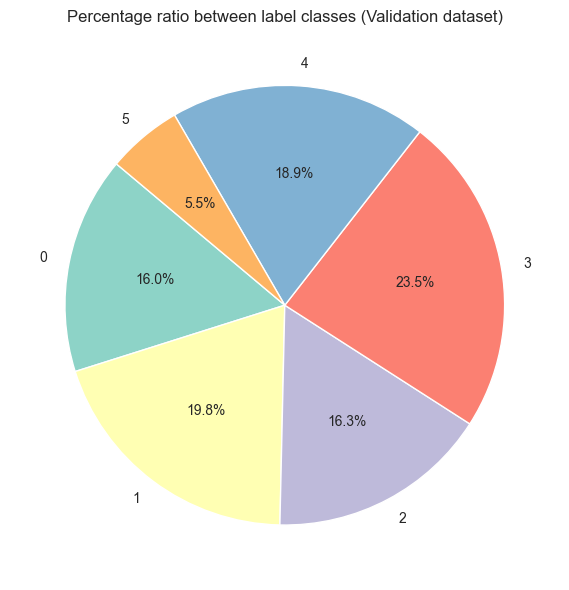

In [49]:
display_pie_chart(df=valid_classes_df, column_name='count', title='Percentage ratio between label classes (Validation dataset)',
                  column_contains_count=True, filename='graphs/validation_piechart')

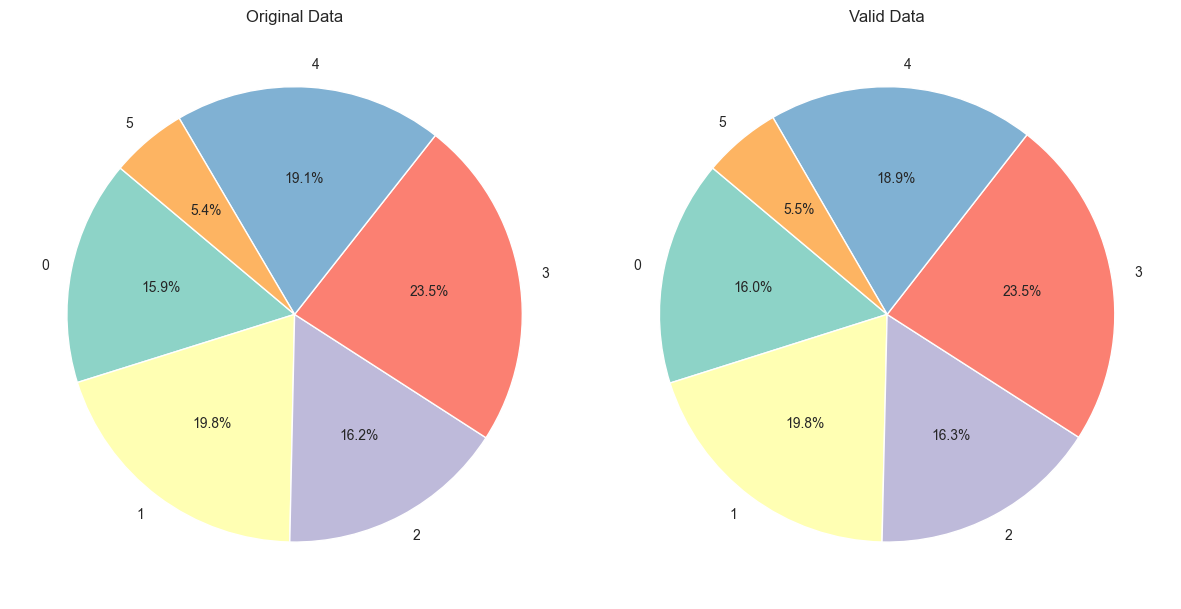

In [46]:
display_pie_charts(first_df=classes_df, second_df=valid_classes_df, column='count',
                   column_contains_count=True, 
                   first_chart_title='Original Data', second_chart_title='Valid Data', 
                   filename='graphs/original_vs_valid_piecharts')

##### Test data

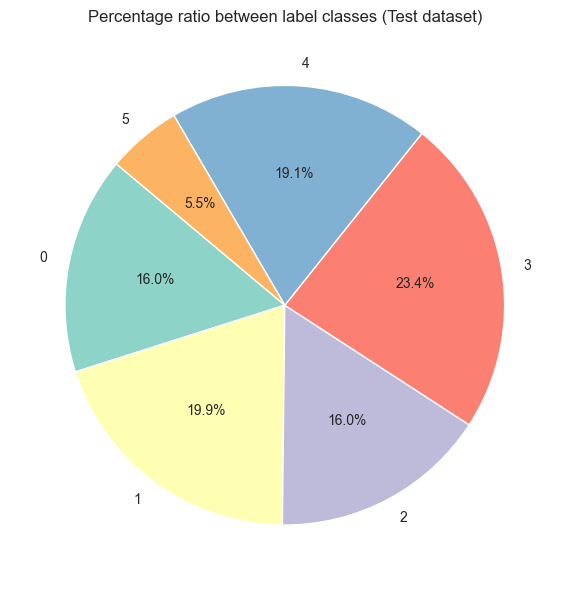

In [50]:
display_pie_chart(df=test_classes_df, column_name='count', title='Percentage ratio between label classes (Test dataset)',
                  column_contains_count=True, filename='graphs/test_piechart')

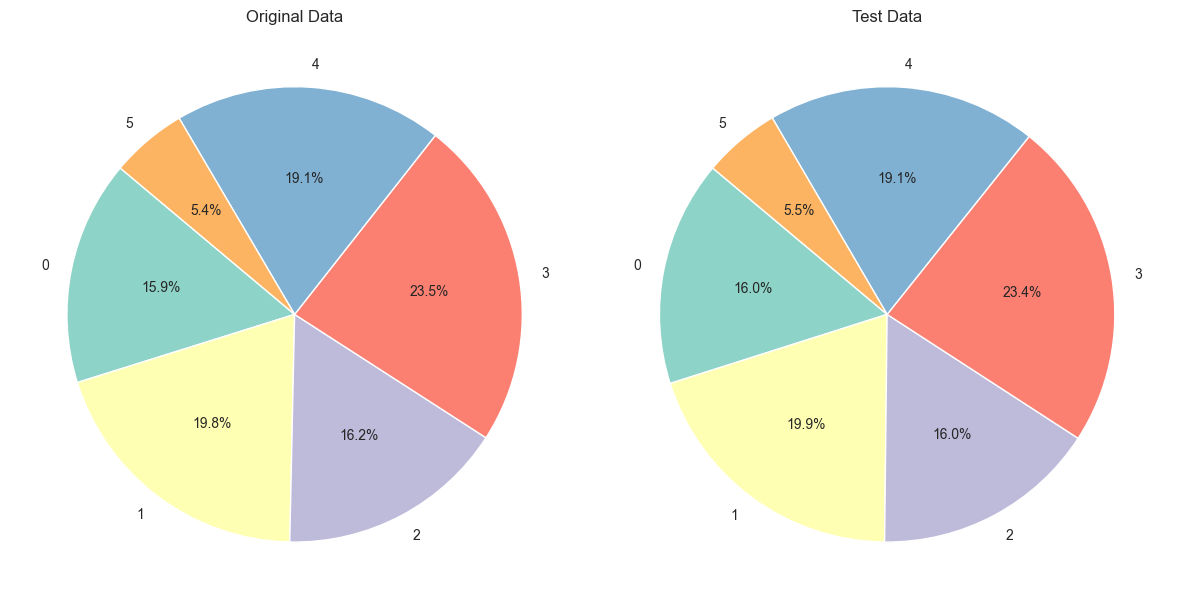

In [47]:
display_pie_charts(first_df=classes_df, second_df=test_classes_df, column='count',
                   column_contains_count=True, 
                   first_chart_title='Original Data', second_chart_title='Test Data', 
                   filename='graphs/original_vs_test_piecharts')